In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
from math import gamma as GammaFn
from scipy.stats import gaussian_kde

$Y_1, Y_2,\ldots, Y_n|\theta \sim^{iid}$   poisson($\theta$) 

Prior = $\mathcal{G}(a,b)$

Posterior = $\mathcal{G}(a+\sum{y_i},b+n)$, $a = 4.5$ and $b = 2$

Given $\sum{y_i} = 75.75, \quad n = 100$ 

In [3]:
# Data and posterior
a = 2 ; b = 1 ; sy = 66 ; n = 44
alpha_post = a + sy
beta_post  = b + n


In [4]:
def gamma(x, alpha, beta):
    return (beta**alpha * x**(alpha-1) * np.exp(-beta*x)) / GammaFn(alpha)


# Simple Gaussian kernel density estimate 
def kde(x, samples, h= 0.01):
    return np.mean(np.exp(-(x - samples)**2 / (2 * h**2))) / (np.sqrt(2*np.pi) * h)

# log of posterir
def log_post(theta):
    if theta <= 0:
        return -np.inf
    return (alpha_post - 1) * np.log(theta) - beta_post * theta

In [5]:
##Monte Carlo draws
N = 20000
samples = np.random.gamma(shape=alpha_post, scale=1/beta_post, size=N)
xs = np.linspace(min(samples), max(samples), 400)
kde_values = np.array([kde(x, samples) for x in xs])
true_values = gamma(xs, alpha_post, beta_post)


In [6]:
# 95% credible interval
lower = np.percentile(samples, 2.5)
upper = np.percentile(samples, 97.5)
print("95% credible interval:", lower, upper)

95% credible interval: 1.1745121073413671 1.8889386209995713


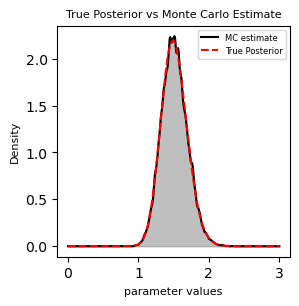

In [19]:
# Plots
plt.figure(figsize=(3,3))
plt.plot(xs, kde_values, color="black", linewidth=1.5, label="MC estimate")
plt.fill_between(xs, kde_values, color="gray", alpha=0.5)
plt.plot(xs, true_values, color="red", linestyle="--", linewidth=1.5, label="True Posterior")
plt.xlabel("parameter values", fontsize = 8)
plt.ylabel("Density", fontsize = 8)
plt.title("True Posterior vs Monte Carlo Estimate", fontsize = 8)
plt.legend(fontsize = 6)
plt.show()

In [8]:
# Metropolis–Hastings MCMC 
N = 20000
chain = np.zeros(N)
chain[0] = 1.0    
sd = 0.15

for t in range(1, N):
    current = chain[t-1]
    proposal = np.random.normal(current, sd)

    # acceptance log-ratio
    logA = log_post(proposal) - log_post(current)

    if np.log(np.random.rand()) < logA:
        chain[t] = proposal
    else:
        chain[t] = current

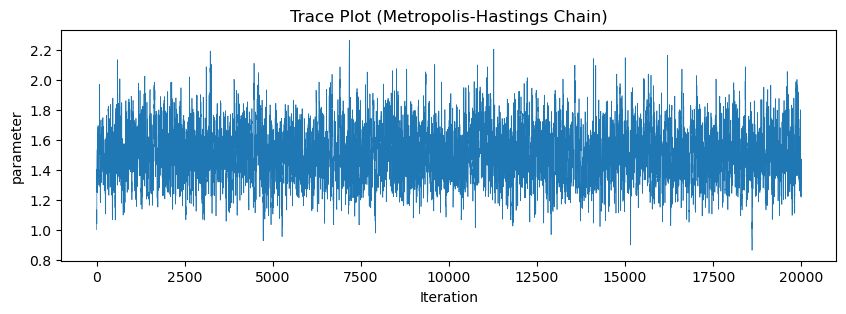

In [9]:

#Trace Plot 
plt.figure(figsize=(10,3))
plt.plot(chain, linewidth=0.5)
plt.xlabel("Iteration")
plt.ylabel("parameter")
plt.title("Trace Plot (Metropolis-Hastings Chain)")
plt.show()


In [10]:
cum_mean = np.cumsum(samples) / np.arange(1, N+1)
x_cdf = 1.75
cum_cdf = np.cumsum(samples <= x_cdf) / np.arange(1, N+1)
cum_quantile = np.array([np.quantile(samples[:i], 0.975) for i in range(1, N+1)])

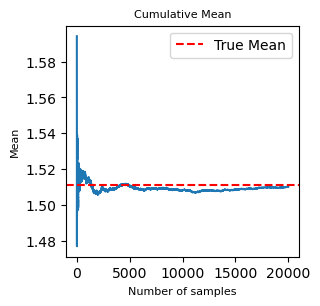

In [ ]:

# Plotting
plt.figure(figsize=(3,3))
plt.plot(cum_mean)
plt.axhline(y=alpha_post/beta_post, color='red', linestyle='--', label='True Mean')
plt.title('Cumulative Mean', fontsize = 8)
plt.xlabel('Number of samples', fontsize = 8)
plt.ylabel('Mean', fontsize = 8)
plt.legend(fontsize = 6)
plt.show()

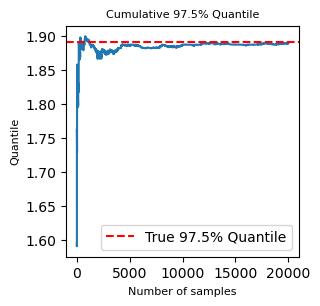

In [ ]:
plt.figure(figsize =(3,3))
plt.plot(cum_quantile)
true_quantile = np.quantile(np.random.gamma(shape=alpha_post, scale=1/beta_post, size=100000), 0.975)
plt.axhline(y=true_quantile, color='red', linestyle='--', label='True 97.5% Quantile')
plt.title('Cumulative 97.5% Quantile', fontsize = 8)
plt.xlabel('Number of samples', fontsize = 8)
plt.ylabel('Quantile', fontsize = 8)
plt.legend(fontsize = 6)
plt.show()

Effects of sample size to the MC approximation

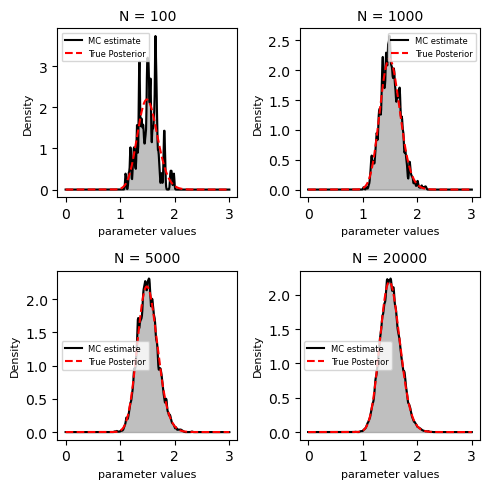

In [ ]:
Ns = [100, 1000, 5000, 20000]
xs = np.linspace(0, 3, 400)
true_values = gamma(xs, alpha_post, beta_post)

plt.figure(figsize=(5, 5))

for i, N in enumerate(Ns, 1):
    samples = np.random.gamma(shape=alpha_post, scale=1/beta_post, size=N)
    kde_values = np.array([kde(x, samples) for x in xs])
    plt.subplot(2, 2, i)
    plt.plot(xs, kde_values, color="black", linewidth=1.5, label="MC estimate")
    plt.fill_between(xs, kde_values, color="gray", alpha=0.5)
    plt.plot(xs, true_values, color="red", linestyle="--", linewidth=1.5, label="True Posterior")
    plt.title(f"N = {N}", fontsize=10)
    plt.xlabel("parameter values", fontsize=8)
    plt.ylabel("Density", fontsize=8)
    plt.legend(fontsize=6)

plt.tight_layout()
plt.show()